# Master TIDE - Conférences Python 2020

Francis Wolinski

&copy; 2020 Yotta Conseil


# 5. Opérations de pivot

Cette séance utilise les données accessibles sur le site de la Sécurité Sociale US.

Prénom, genre et nombre de naissances des enfants nés aux USA depuis 1880.

Seuls les prénoms avec au moins 5 naissances dans une année sont présents.

In [1]:
# import des modules usuels
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import seaborn as sns

# commande magique pour l'affichage des graphiques
%matplotlib inline

# options d'affichage
pd.set_option("display.max_rows", 16)
plt.style.use('seaborn-darkgrid')

In [2]:
# names
# https://www.ssa.gov/oact/babynames/names.zip

from os.path import exists

if exists("names.dat"):   
    df = pd.read_pickle("names.dat") # restauration à partir du format pickle

else:
    import glob # Python module qui implémente la fonction glob()

    files =  glob.glob('names/*.txt')  # lecture des fichiers .txt
    files.sort()
    dfs = []
    for filename in files:
        year = int(filename[-8:-4]) # extraction de l'année
        csv = pd.read_csv(filename, names=['name', 'gender', 'births']) # chargement d'un fichier unitaire
        csv['year'] = year # ajout de la colonne année
        dfs.append(csv)
        
    df = pd.concat(dfs, ignore_index=True) # concaténation de tous les DataFrames

    df = df[['year', 'name', 'gender', 'births']] # ordre des colonnes
    df.to_pickle("names.dat") # sauvegarde au format pickle
    
df.shape

(1989401, 4)

In [85]:
ls names

 Le volume dans le lecteur C s'appelle OS
 Le num‚ro de s‚rie du volume est C689-0282

 R‚pertoire de C:\Users\Francis\YottaConseil\Missions\TIDE\notebooks_2020\names

18/11/2020  15:59    <REP>          .
18/11/2020  15:59    <REP>          ..
27/03/2020  19:06           120ÿ760 NationalReadMe.pdf
27/03/2020  18:52            24ÿ933 yob1880.txt
27/03/2020  18:52            24ÿ065 yob1881.txt
27/03/2020  18:52            26ÿ559 yob1882.txt
27/03/2020  18:52            26ÿ002 yob1883.txt
27/03/2020  18:52            28ÿ670 yob1884.txt
27/03/2020  18:52            28ÿ625 yob1885.txt
27/03/2020  18:52            29ÿ822 yob1886.txt
27/03/2020  18:52            29ÿ531 yob1887.txt
27/03/2020  18:52            33ÿ064 yob1888.txt
27/03/2020  18:52            32ÿ297 yob1889.txt
27/03/2020  18:52            33ÿ621 yob1890.txt
27/03/2020  18:52            33ÿ186 yob1891.txt
27/03/2020  18:52            36ÿ542 yob1892.txt
27/03/2020  18:52            35ÿ433 yob1893.txt
27/03/2020  18:52           

In [4]:
df

,year,name,gender,births
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746
...,...,...,...,...
1989396,2019,Zyheem,M,5
1989397,2019,Zykel,M,5
1989398,2019,Zyking,M,5
1989399,2019,Zyn,M,5


## 5.1 Fonction `crosstab()`

La fonction `crosstab()` calcule les modalités croisées de deux facteurs (2 objets de type `Series` partageant le même index. Par ex, 2 colonnes d'un même `DataFrame`).

L'option `margine=True` calcule le total par ligne et par colonne. L'option `normalize=...` normalise les résultats en pourcentages compris entre 0 et 1 (`True` : toutes les valeurs, `index` : par ligne, `columns` par colonne).

Le résultat est un objet de type `DataFrame` : l'index comprend les différentes modalités de la première `Series` et les colonnes les différentes modalités de la seconde `Series`.

In [5]:
# ajout de la longueur des prénoms
df['length'] = df['name'].str.len()
df

,year,name,gender,births,length
0,1880,Mary,F,7065,4
1,1880,Anna,F,2604,4
2,1880,Emma,F,2003,4
3,1880,Elizabeth,F,1939,9
4,1880,Minnie,F,1746,6
...,...,...,...,...,...
1989396,2019,Zyheem,M,5,6
1989397,2019,Zykel,M,5,5
1989398,2019,Zyking,M,5,6
1989399,2019,Zyn,M,5,3


In [6]:
# crosstable simple
pd.crosstab(df['length'], df['gender'])

gender,F,M
length,,
2,1707,3080
3,18630,23825
4,93869,90033
5,231542,187234
6,324915,241181
7,279680,158377
8,149541,70468
9,55001,26194
10,15134,9060


In [7]:
# crosstable simple
pd.crosstab(df['length'], df['gender'], margins=True)

gender,F,M,All
length,,,
2,1707,3080,4787
3,18630,23825,42455
4,93869,90033,183902
5,231542,187234,418776
6,324915,241181,566096
7,279680,158377,438057
8,149541,70468,220009
9,55001,26194,81195
10,15134,9060,24194


In [10]:
# crosstable simple
pd.crosstab(df['length'], df['gender'], margins=True, normalize=True)*100

gender,F,M,All
length,,,
2,0.085805,0.154820,0.240625
3,0.936463,1.197597,2.134059
4,4.718455,4.525634,9.244089
5,11.638780,9.411577,21.050356
6,16.332303,12.123297,28.455600
7,14.058503,7.961040,22.019543
8,7.516886,3.542172,11.059057
9,2.764702,1.316678,4.081379
10,0.760731,0.455413,1.216145


In [13]:
# crosstable simple
pd.crosstab(df['length'], df['gender'], margins=True, normalize='index')

gender,F,M
length,,
2,0.356591,0.643409
3,0.438818,0.561182
4,0.510429,0.489571
5,0.552902,0.447098
6,0.573957,0.426043
7,0.638456,0.361544
8,0.679704,0.320296
9,0.677394,0.322606
10,0.625527,0.374473


In [8]:
pd.crosstab?

## 5.2 La méthode `pivot_table()`

La méthode `pivot_table()` construit un tableau synthétique de valeurs agrégées et ventilées selon les différentes valeurs d'une ou plusieurs colonnes.

Elle retourne un nouveau `DataFrame` en fonction des paramètres fournis.

- values : colonnes du `DataFrame` initial dont les valeurs sont agrégées
- index : colonnes du `DataFrame` initial dont les valeurs sont utilisées en index
- columns : colonnes du `DataFrame` initial dont les valeurs sont utilisées en nom de colonnes
- aggfunc : fonction d'agrégation des valeurs, par défaut `numpy.mean` (calcul de la moyenne des valeurs), : mean, min, max, sum, count, nunique, median, fonction ou lambda.

In [14]:
# pivot table naissances par année et genres
var = df.pivot_table(values='births',
            index='year',
            columns='gender',
            aggfunc='sum')
var

gender,F,M
year,,
1880,90994,110490
1881,91953,100743
1882,107847,113686
1883,112319,104625
1884,129019,114442
...,...,...
2015,1781725,1913059
2016,1767902,1893471
2017,1721550,1845472


In [15]:
# vérification
df.loc[(df['year']==1880)&(df['gender']=='F'), 'births'].sum()

90994

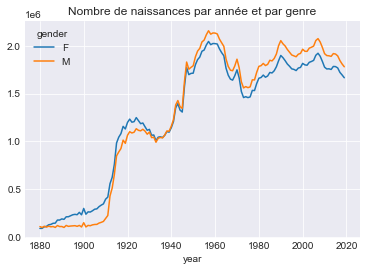

In [16]:
# graphique
var.plot(title='Nombre de naissances par année et par genre'); # pour changer les couleurs par exemple color=['m', 'c']

In [19]:
# sans l'option columns
var = df.pivot_table(values='births',
            index='year',
            aggfunc='sum')
var

,births
year,
1880,201484
1881,192696
1882,221533
1883,216944
1884,243461
...,...
2015,3694784
2016,3661373
2017,3567022


<div class="alert alert-success">
<b>Exercice 1</b>
<ul>
    <li>Pivot table avec le premier ou le dernier nom par ordre alphabétique par année et par genre.</li>
</ul>

In [20]:
df.pivot_table(values='name',
            index='year',
            columns='gender',
            aggfunc='min')

gender,F,M
year,,
1880,Abbie,Aaron
1881,Abbie,Aaron
1882,Abbie,Aaron
1883,Abbie,Aaron
1884,Abbie,Aaron
...,...,...
2015,Aabha,Aaban
2016,Aabha,Aaban
2017,Aabriella,Aaban


In [24]:
def get_first_name(names):
    return sorted(names)[0]

def get_first_name(names):
    return names.min()

df.pivot_table(values='name',
            index='year',
            columns='gender',
            aggfunc=get_first_name)

gender,F,M
year,,
1880,Abbie,Aaron
1881,Abbie,Aaron
1882,Abbie,Aaron
1883,Abbie,Aaron
1884,Abbie,Aaron
...,...,...
2015,Aabha,Aaban
2016,Aabha,Aaban
2017,Aabriella,Aaban


In [29]:
df.pivot_table(values='name',
            index='year',
            columns='gender',
            aggfunc=lambda x: x.min())

gender,F,M
year,,
1880,Abbie,Aaron
1881,Abbie,Aaron
1882,Abbie,Aaron
1883,Abbie,Aaron
1884,Abbie,Aaron
...,...,...
2015,Aabha,Aaban
2016,Aabha,Aaban
2017,Aabriella,Aaban


In [31]:
df.pivot_table(values='name',
            index='year',
            columns='gender',
            aggfunc=['min', 'max'])

min              max        
gender          F      M         F       M
year                                      
1880        Abbie  Aaron      Zula    Zeke
1881        Abbie  Aaron      Zula     Zeb
1882        Abbie  Aaron      Zula     Zed
1883        Abbie  Aaron      Zula    Zeno
1884        Abbie  Aaron      Zula  Zollie
...           ...    ...       ...     ...
2015        Aabha  Aaban  Zyrielle   Zyvon
2016        Aabha  Aaban      Zyva   Zyrus
2017    Aabriella  Aaban      Zyva   Zyrus
2018      Aabidah  Aaban      Zyva   Zzyzx
2019        Aabha  Aaban      Zyva   Zyrus

[140 rows x 4 columns]

In [32]:
df.pivot_table(values='name',
            index='year',
            columns='gender',
            aggfunc=lambda x: (x.min(), x.max()))

gender,F,M
year,,
1880,"(Abbie, Zula)","(Aaron, Zeke)"
1881,"(Abbie, Zula)","(Aaron, Zeb)"
1882,"(Abbie, Zula)","(Aaron, Zed)"
1883,"(Abbie, Zula)","(Aaron, Zeno)"
1884,"(Abbie, Zula)","(Aaron, Zollie)"
...,...,...
2015,"(Aabha, Zyrielle)","(Aaban, Zyvon)"
2016,"(Aabha, Zyva)","(Aaban, Zyrus)"
2017,"(Aabriella, Zyva)","(Aaban, Zyrus)"


In [37]:
var = df.pivot_table(values='name',
            index='year',
            columns='gender',
            aggfunc=lambda x: (x.min(), x.max()))
var['F'].str[0]

year
1880        Abbie
1881        Abbie
1882        Abbie
1883        Abbie
1884        Abbie
          ...    
2015        Aabha
2016        Aabha
2017    Aabriella
2018      Aabidah
2019        Aabha
Name: F, Length: 140, dtype: object

In [23]:
get_first_name(['toto', 'titi', 'tata'])

'tata'

In [39]:
df.loc[(df['year']==1880)&(df['gender']=='F'), 'name'].values.min()

'Abbie'

In [27]:
df.pivot_table(values='name',
            index='year',
            columns='gender',
            aggfunc='max')

gender,F,M
year,,
1880,Zula,Zeke
1881,Zula,Zeb
1882,Zula,Zed
1883,Zula,Zeno
1884,Zula,Zollie
...,...,...
2015,Zyrielle,Zyvon
2016,Zyva,Zyrus
2017,Zyva,Zyrus


In [28]:
df.loc[(df['year']==1880)&(df['gender']=='F'), 'name'].values.max()

'Zula'

<div class="alert alert-success">
<b>Exercice 2</b>
<ul>
    <li>Pivot table avec la diversité des prénoms (nombre de prénoms différents) par année et par genre.</li>
    <li>Vérifier pour les femmes en 1880.</li>
    <li>Calcul de la différence de diversité des prénoms entre les hommes et les femmes par année</li>
    <li>Calcul du maximum de cette différence. Pour quelle année ?</li>
    <li>Faire un graphique.</li>
</ul>

In [40]:
df.pivot_table(values='name',
            index='year',
            columns='gender',
            aggfunc='nunique')

gender,F,M
year,,
1880,942,1058
1881,938,997
1882,1028,1099
1883,1054,1030
1884,1172,1125
...,...,...
2015,19099,14039
2016,18847,14181
2017,18400,14229


In [42]:
df.loc[(df['year']==1880)&(df['gender']=='F'), 'name'].nunique()

942

In [43]:
var = df.pivot_table(values='name',
            index='year',
            columns='gender',
            aggfunc='nunique')
var

gender,F,M
year,,
1880,942,1058
1881,938,997
1882,1028,1099
1883,1054,1030
1884,1172,1125
...,...,...
2015,19099,14039
2016,18847,14181
2017,18400,14229


In [46]:
var['diff'] = var['F'] - var['M']
var

gender,F,M,diff
year,,,
1880,942,1058,-116
1881,938,997,-59
1882,1028,1099,-71
1883,1054,1030,24
1884,1172,1125,47
...,...,...,...
2015,19099,14039,5060
2016,18847,14181,4666
2017,18400,14229,4171


In [49]:
var[['F', 'M']].diff(axis=1)

gender,F,M
year,,
1880,NaN,116.0
1881,NaN,59.0
1882,NaN,71.0
1883,NaN,-24.0
1884,NaN,-47.0
...,...,...
2015,NaN,-5060.0
2016,NaN,-4666.0
2017,NaN,-4171.0


In [53]:
var['diff'].max()

6176

In [52]:
var['diff'].idxmax()

2007

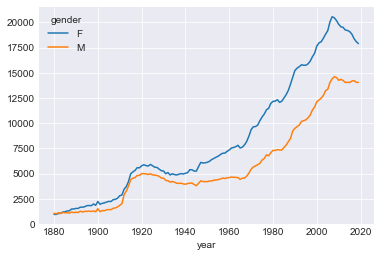

In [55]:
var[['F', 'M']].plot();

In [57]:
df['name'].value_counts().head(16)

John       280
James      280
Johnnie    280
Francis    280
William    280
Sidney     280
Jessie     280
Jean       280
Joseph     280
Leslie     280
Lee        280
Marion     280
Tommie     280
Jesse      280
Ollie      280
Henry      279
Name: name, dtype: int64

In [58]:
df.nlargest(10, 'births')

,year,name,gender,births,length
431067,1947,Linda,F,99690,5
441438,1948,Linda,F,96213,5
437170,1947,James,M,94766,5
544655,1957,Michael,M,92726,7
437171,1947,Robert,M,91645,6
451679,1949,Linda,F,91019,5
533188,1956,Michael,M,90662,7
556233,1958,Michael,M,90531,7
447479,1948,James,M,88587,5
510821,1954,Michael,M,88586,7


## 6. Gestion des valeurs manquantes et des doublons

### 6.1 Valeurs manquantes

Le module pandas possède des fonctions pour gérer les valeurs manquantes.

In [59]:
# pivot table of a subset of df with name equals to mary
var = df.loc[(df['name']=='Mary')]
tab = var.pivot_table(values='births',
                        index='year',
                        columns='gender',
                        aggfunc='sum')
tab

gender,F,M
year,,
1880,7065.0,27.0
1881,6919.0,29.0
1882,8148.0,30.0
1883,8012.0,32.0
1884,9217.0,36.0
...,...,...
2015,2633.0,NaN
2016,2518.0,NaN
2017,2413.0,NaN


On constate que la valeur `NaN` est affichée dans certaines lignes.

Il s'agit de la valeur `np.nan`, `NaN` signifiant "Not a Number".

`NaN` est objet spécial introduit par `NumPy` pour représenter l'absence de valeur.

Il est à noter que la fonction `crosstab()` ne produit pas de `NaN` mais met des 0.

In [60]:
# crosstab année x genre pour le prénom Mary
pd.crosstab(var['year'], var['gender'])

gender,F,M
year,,
1880,1,1
1881,1,1
1882,1,1
1883,1,1
1884,1,1
...,...,...
2015,1,0
2016,1,0
2017,1,0


In [61]:
# accès à la valeur
tab.iloc[-1, -1]

nan

In [62]:
# l'objet NaN de NumPy
np.nan

nan

In [63]:
# NaN est un nombre flottant
type(np.nan)

float

In [64]:
# arithmétique de NaN : NaN est un élément absorbant
np.nan + 1  # avec n'importe quelle opération mathématique

nan

In [65]:
# toute opération avec NaN renvoie Nan
1 + np.nan

nan

In [66]:
# fonctions
np.sqrt(np.nan)  # avec n'importe quelle fonction mathématique

nan

In [67]:
np.nan == np.nan

False

La librairie pandas propose toute une panoplie d'outils pour gérer l'absence de valeur, phénomène fréquent lorsque l'on fait de l'analyse de données.

In [69]:
tab == np.nan

gender,F,M
year,,
1880,False,False
1881,False,False
1882,False,False
1883,False,False
1884,False,False
...,...,...
2015,False,False
2016,False,False
2017,False,False


In [68]:
# test sur la présence de Nan
tab.isnull()

gender,F,M
year,,
1880,False,False
1881,False,False
1882,False,False
1883,False,False
1884,False,False
...,...,...
2015,False,True
2016,False,True
2017,False,True


In [70]:
# test sur l'absence de Nan
tab.notnull()

gender,F,M
year,,
1880,True,True
1881,True,True
1882,True,True
1883,True,True
1884,True,True
...,...,...
2015,True,False
2016,True,False
2017,True,False


In [71]:
# lignes ayant au moins un NaN
tab.loc[tab.isnull().any(axis=1)]

gender,F,M
year,,
2008,3500.0,NaN
2009,3166.0,NaN
2011,2709.0,NaN
2013,2657.0,NaN
2015,2633.0,NaN
2016,2518.0,NaN
2017,2413.0,NaN
2018,2349.0,NaN
2019,2209.0,NaN


In [72]:
# suppression des lignes comportant un Nan
tab.dropna()

gender,F,M
year,,
1880,7065.0,27.0
1881,6919.0,29.0
1882,8148.0,30.0
1883,8012.0,32.0
1884,9217.0,36.0
...,...,...
2006,4095.0,10.0
2007,3688.0,10.0
2010,2873.0,5.0


In [73]:
# suppression des colonnes comportant un Nan
tab.dropna(axis=1)

gender,F
year,
1880,7065.0
1881,6919.0
1882,8148.0
1883,8012.0
1884,9217.0
...,...
2015,2633.0
2016,2518.0
2017,2413.0


In [74]:
pd.DataFrame.dropna?

In [75]:
# remplacement des NaN par une valeur fixe
tab.fillna(0)

gender,F,M
year,,
1880,7065.0,27.0
1881,6919.0,29.0
1882,8148.0,30.0
1883,8012.0,32.0
1884,9217.0,36.0
...,...,...
2015,2633.0,0.0
2016,2518.0,0.0
2017,2413.0,0.0


Il existe d'autres méthodes de remplissage (ffill, bfill), voir http://pandas.pydata.org/pandas-docs/stable/missing_data.html

Il faut aussi étudier les options de la fonction `read_csv()` :

- na_values
- keep_default_na
- na_filter

In [77]:
pd.Series.interpolate?

In [78]:
# read_csv()

pd.read_csv?

### 6.2 Doublons

Il est également possible de supprimer les éventuelles lignes dupliquées. La méthode `duplicated()` détermine si les lignes sont dupliquées ou non et la méthode `drop_duplicates()` supprime les doublons (seule la première ligne est conservée).

In [80]:
# décompte des lignes dupliquées
df[['year', 'name']].duplicated().value_counts()

False    1815784
True      173617
dtype: int64

In [81]:
# supression des lignes dupliquées
var = df[['year', 'name']].drop_duplicates()
var.shape

(1815784, 2)

In [83]:
var

,year,name
0,1880,Mary
1,1880,Anna
2,1880,Emma
3,1880,Elizabeth
4,1880,Minnie
...,...,...
1989396,2019,Zyheem
1989397,2019,Zykel
1989398,2019,Zyking
1989399,2019,Zyn


In [84]:
pd.DataFrame.drop_duplicates?

## Exercices complémentaires

<div class="alert alert-success">
<b>Exercice 3</b>
<p>Nous allons tracer l'évolution de la diversité des prénoms se terminant par une lettre donnée, et ce, pour les 7 lettres ayant le plus de diversité en 2018.</p>
    <ul>
    <li>Ajouter une colone au DataFrame avec la dernière lettre de chaque prénom en majuscule</li>
    <li>Calculer un tableau croisé avec les années et les lettres terminales donnant le nombre de prénoms</li>
    <li>Sélectionner les 7 plus grandes valeurs de la ligne correspondant à la dernière année</li>
    <li>Tracer le tableau croisé obtenu limité aux 7 lettres correspondant aux 7 plus grandes valeurs trouvées</li>
    </ul>
</div>

<div class="alert alert-success">
<b>Exercice 4</b>
<p>Etude des prénoms qui ont changé de genre 1/2</p>
    <ul>
    <li>Faire un value counts des prénoms. Quelle interprétation ?</li>
    <li>Calculer la liste des prénoms qui apparaissent au moins 10000 fois.</li>
    <li>Sélectionner ces prénoms dans le `DataFrame`.</li>
    <li>Pour chaque prénom calculer le nombre de naissances par genre et le ratio "F/(F + M)".</li>
    <li>Afficher un histogramme du ratio trouvé.</li>
    </ul>
</div>

<div class="alert alert-success">
<b>Exercice 5</b>
<p>Etude des prénoms qui ont changé de genre 2/2</p>
    <ul>
    <li>Sélectionner le prénom "Leslie".</li>
    <li>Calculer les ratios "F/(F + M)" et "M/(F + M)" avec la méthode <code>div()</code>.</li>
    <li>Afficher un graphe avec l'évolution de ces ratios dans le temps.</li>
    <li>Essayer avec d'autres prénoms : Kim, Donnie, Jean.</li>
    </ul>
</div>